##### <h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO T780: Applied Machine Learning</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<h4> </h4>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Friday, August 21, 2020</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR TEAM NUMBER AND MEMBERS' NAMES BELOW</h3>

### TEAM NUMBER: 05

### TEAM MEMBERS:
Name: John Ray Martinez, ID: JBM332, Email: jbm3322@drexel.edu

Name: Jonathan Musni, ID: JEM742, Email: jem742@drexel.edu

Name: Juan Miguel Trinidad, ID: JBT46, Email: jbt46@drexel.edu
### A. Assignment Overview
This assignment provides the opportunity for you to practice with various skills in data pre-processing, feature analyses, and model tuning. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59 pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Academic Honesty

Each student is required to submit the Academic Honesty Form at the beginning of the term to cover all the deliverables (for example: assignments, projects, quizzes). Each piece of work must be original. That means, individual quizzes must be done individually without discussing and collaborating with anybody else. Team assignments must be written and programmed by your own team members. No team should copy any piece of work from other teams. The Drexel University Academic Honesty Rules and Procedures (as stated in the student handbook) will be adhered to strictly.  

### G. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. When breaking up a long line, break it before an operator, not after. 

### H. Answer the following questions: 
Your answer should be combined with code and brief text answer. Please ensure that your Jupyter notebook does not have too much spurious output. If you like, you can share your notebook in progress with me on Kaggle: leiwangv (lw474@drexel.edu)

### Data for this assignment:
* URL: https://www.kaggle.com/ajaysingh123/wine-quality-clustering-unsupervised
* On Kaggel Notebook, you can add the data set by searching the above URL
* In the unsupervised learning part of this assignment, you should work without the ground truth labels. (Drop the corresponding column)


In [165]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Question 1:
Create plots to visualize the distribution of all features. What did you find out?

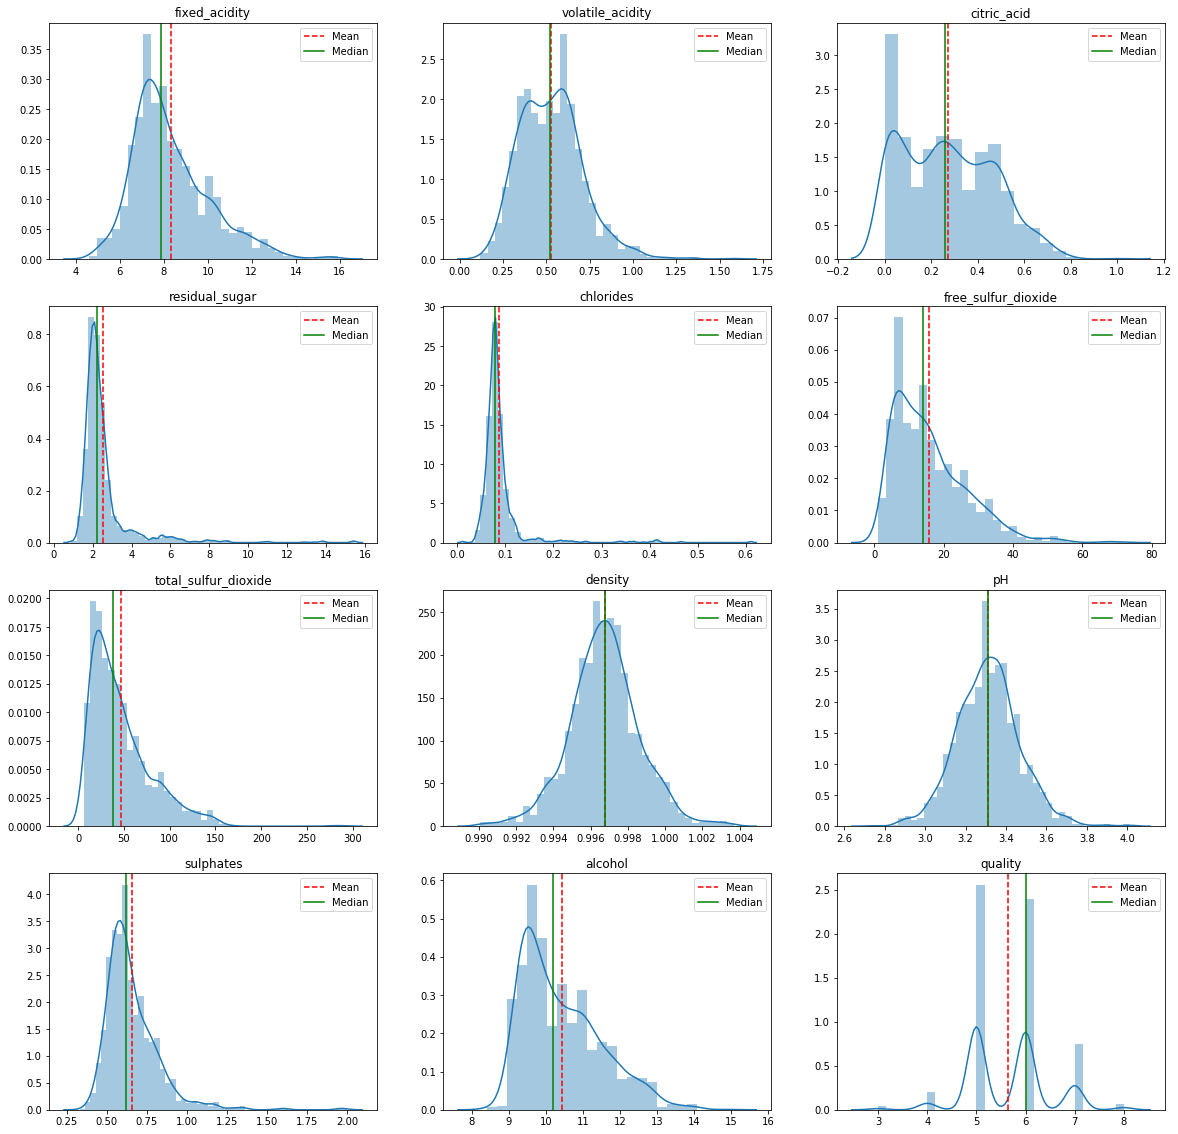

In [72]:
import numpy as np

fig1 = plt.figure(figsize=(20,20), facecolor='white')
grid_spec = fig1.add_gridspec(ncols = 3, nrows= math.ceil(len(df.columns) / 3))

fig_row = 0
fig_col = 0
for col in df.columns:
    f_ax = fig1.add_subplot(grid_spec[fig_row, fig_col])
    f_ax.set_title(col)
    
    #get the mean and median values of each column
    mean=df[col].mean()
    median=df[col].median()

    sns.distplot(df[col], ax = f_ax)
    #plot mean and median in the distplot
    f_ax.axvline(mean, color='r', linestyle='--')
    f_ax.axvline(median, color='g', linestyle='-')
    
    #labels
    f_ax.set_xlabel("")
    plt.legend({'Mean':mean,'Median':median})
    
    #next column
    fig_col +=1
    #making sure there are only three graphs in each column
    if fig_col == 3:
        fig_col = 0
        fig_row +=1    

Observations:
* Majority of the features are skewed to the right.
* The 'density' column resembles a bell shaped curve and the mean and median values are in the middle which signifies a normally distributed data.

#### Question 2:
Create plots to visualize the data using PCA (top two principal components). Plot explained variance (%) in PCA. What would be a good threshold for the number of principal components if you wanted to reduce the dimensionality of the data?

In [11]:
features = df.columns.tolist()

#features
X = df[features[:-1]]

#target variable - quality
Y = df[features[-1]]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


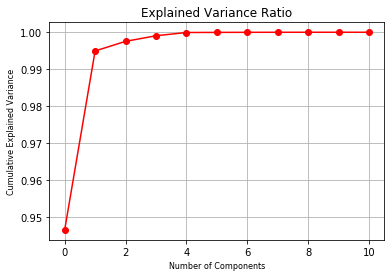

In [121]:
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(X)

pca = PCA()
x_pca = pca.fit_transform(X)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Components", fontsize = 8)
plt.ylabel("Cumulative Explained Variance", fontsize = 8)
plt.grid()

Based on the graph above, A good number of components to reduce the dimensionality of the data is two because it holds around 99% information of the data.

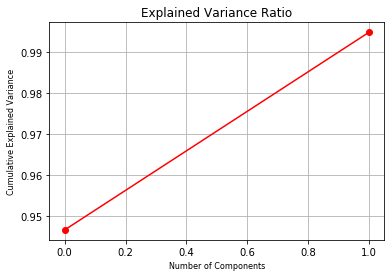

In [117]:
pca = PCA(n_components  = 2)
x_pca = pca.fit_transform(X)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title("Explained Variance Ratio")
plt.xlabel("Number of Components", fontsize = 8)
plt.ylabel("Cumulative Explained Variance", fontsize = 8)
plt.grid()

In [109]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.94657698]


Having n_components = 2 explains around ... variance of the data and we are only losing around ... of information.

In [118]:
df['pca-one'] = x_pca[:,0]
df['pca-two'] = x_pca[:,1] 
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,pca-one,pca-two
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-13.224905,-2.023900
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,22.037724,4.408322
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.162673,-2.501461
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,13.430063,-1.951122
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-13.224905,-2.023900


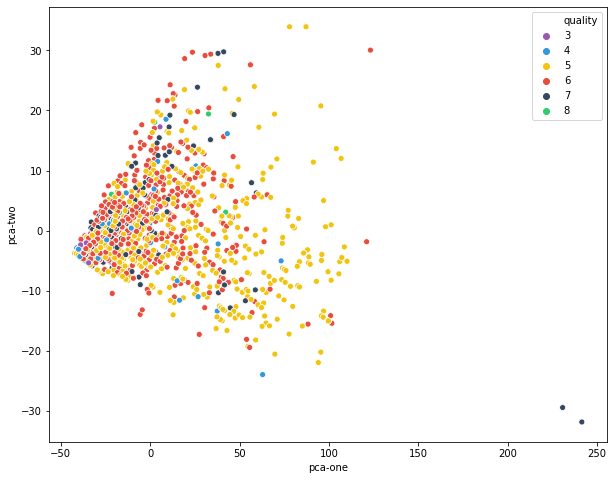

In [120]:
plt.figure(figsize=(10,8))
flatui = ["#9b59b6", "#3498db", "#f1c40f", "#e74c3c", "#34495e", "#2ecc71"]
sns.scatterplot(
    x = "pca-one", 
    y="pca-two",
    hue="quality",
    palette=sns.color_palette(flatui),
    data = df,
    legend="full"
)

#### Question 3: 
Create plots to visualize the data using t-SNE. Would parameter tuning help to gain a better visualization? Discuss your results and findings.

In [128]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 42)
wine_tsne = tsne.fit_transform(X)

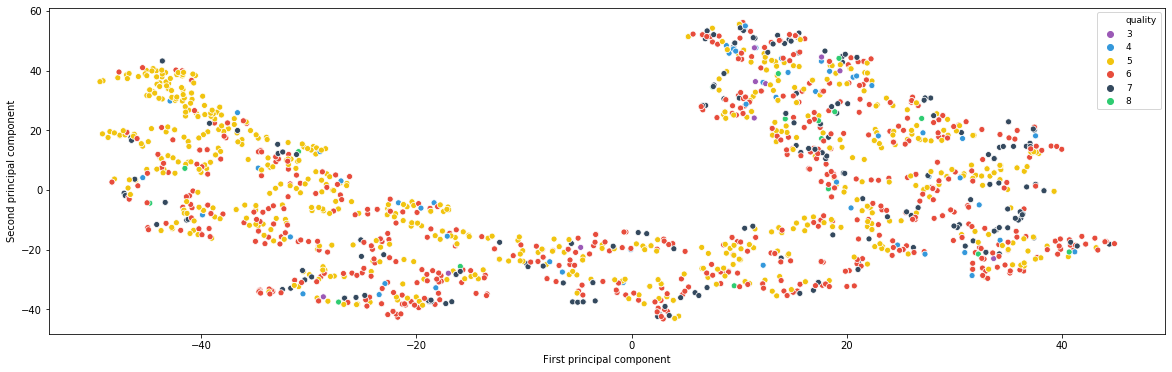

In [158]:
flatui = ["#9b59b6", "#3498db", "#f1c40f", "#e74c3c", "#34495e", "#2ecc71"]
df_tsne = df.copy()
del df["pca-one"]
del df["pca-two"]
df_tsne["First principal component"] = wine_tsne[:,0]
df_tsne["Second principal component"] = wine_tsne[:,1]
plt.figure(figsize=(20, 6))
sns.scatterplot(
    x="First principal component", y="Second principal component",
    hue="quality",
    palette=sns.color_palette(flatui),
    data=df_tsne,
    legend = "full"
)
plt.legend(loc="upper right", prop={'size': 9})


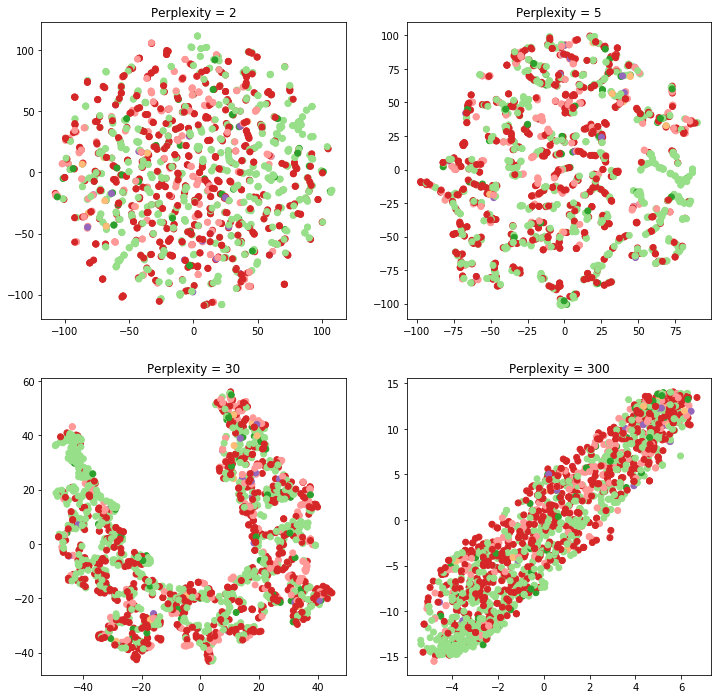

In [163]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, perplexity in enumerate([2, 5, 30, 300]):
    plt.sca(axes[i // 2, i % 2])
    wine_tsne = TSNE(n_components=2,perplexity=perplexity, random_state=42).fit_transform(X)
    plt.scatter(wine_tsne[:, 0], wine_tsne[:, 1], c=plt.cm.tab20(Y))
    plt.title("Perplexity = {}".format(perplexity))

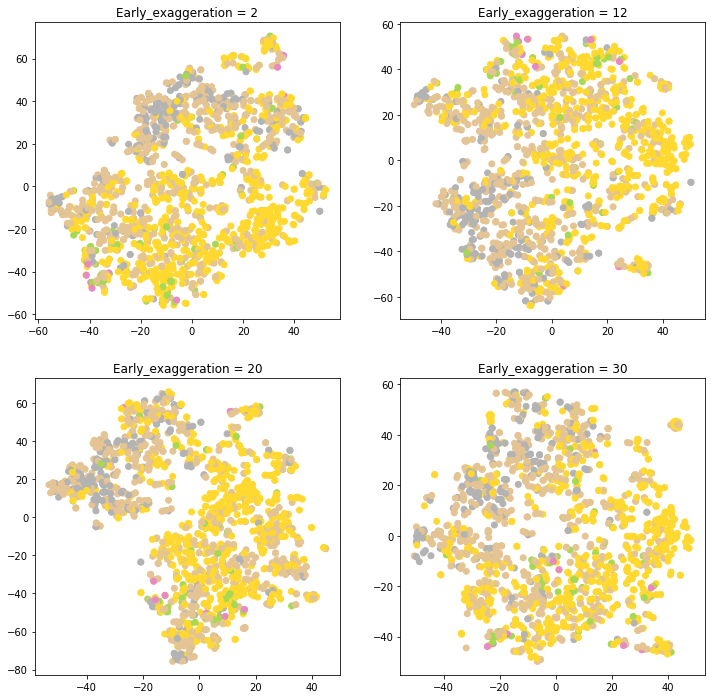

In [167]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, early_exaggeration in enumerate([2, 12, 20, 30]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=30, 
                                                       early_exaggeration=early_exaggeration, random_state=42))
    wine_tsne = tsne_scaled.fit_transform(X)
    plt.scatter(wine_tsne[:, 0], wine_tsne[:, 1], c=plt.cm.Set2(Y))
    plt.title("Early_exaggeration = {}".format(early_exaggeration))

#### Question 4: 
Use different clustering algorithms to cluster the data: K-Means, DBSCAN, Agglomerative clustering, Gaussian Mixture. For each algorithm, tune the parameters for a reasonable outcome, inspect and visualize the outcome. Discuss your results and findings.

##### K - Means

In [168]:
from sklearn.cluster import KMeans

# visually check, 5 cluseters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# kmeans preserves the labels of the instances it was trained on
kmeans.labels_ 

array([3, 0, 0, ..., 3, 3, 3])

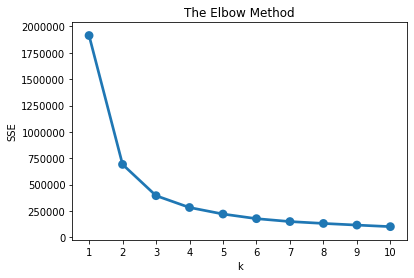

In [170]:
# find the ideal number of clusters
# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center
    
# Plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [181]:
#stadardize data
X_scaled = StandardScaler().fit_transform(X)

In [183]:
from sklearn.cluster import KMeans

# visually check, 5 cluseters
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# kmeans preserves the labels of the instances it was trained on
kmeans.labels_ 

array([0, 0, 0, ..., 0, 0, 0])

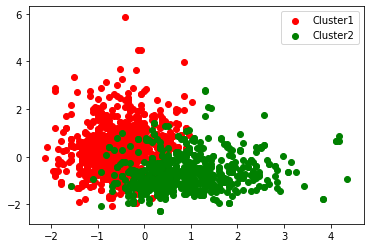

In [184]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters==i,0],
               X_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

##### DBSCAN

##### Agglomerative clustering

##### Gaussian Mixture

#### Quesetion 5:
Evaluate your results with the ground truth label: [Normalized Mutual Information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) and [Adjust Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html ). Discuss how well did you do in Question 4.

In [207]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

k_means_nmis = normalized_mutual_info_score(Y, clusters)
k_means_ars = adjusted_rand_score(Y, clusters)

dbscan_nmis = 0
dbscan_ars = 0

agglomerative_clustering_nmis = 0
agglomerative_clustering_ars = 0

gaussian_mixture_nmis = 0
gaussian_mixture_ars = 0

results_dict = {"K - Means": [k_means_nmis, k_means_ars],
               "DBSCAN": [dbscan_nmis, dbscan_ars],
               "Agglomerative clustering": [agglomerative_clustering_nmis, agglomerative_clustering_ars],
               "Gaussian Mixture": [gaussian_mixture_nmis, gaussian_mixture_ars]}

In [209]:
results = pd.DataFrame(results_dict).T
results.rename({0:"Normalized Mutual Info Score", 1: "Adjusted Rand Score"}, axis = 1)

,Normalized Mutual Info Score,Adjusted Rand Score
K - Means,0.037068,0.043276
DBSCAN,0.000000,0.000000
Agglomerative clustering,0.000000,0.000000
Gaussian Mixture,0.000000,0.000000


#### Question 6:
Supervised learning: Utilize Voting classifier, bagging classifier (ensemble methods can include any supervised learning algorithms we introduced from before week 7) and Random Forest Classifier, compare the performance, interpret the results. 

##### Utilize Voting classifier

##### Bagging Classifier

##### Random Forest Classifer

#### Question 7:
Tune the parameters for Random Forest Classifier, does changing the `class-weight` help? Discuss your results and findings.

#### References:
1. https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
1. https://www.kaggle.com/loaiabdalslam/classification-pca-kernel-99
1. https://www.kaggle.com/rajmiglani/pca-py-ml-5